In [ ]:
# Imports and settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import train_test_split
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.naive_bayes import GaussianNB

In [ ]:
corona_df = pd.read_csv('/content/data-0N9rhD4QmjZQKc4qdFKyt.csv')
corona_df 

,id,Oxygen,PulseRate\t,Temperature,Result
0,1,90,100,97,Negative
1,2,91,74,96,Negative
2,3,95,68,98,Positive
3,4,98,86,95,Negative
4,5,93,97,95,Negative
...,...,...,...,...,...
494,495,94,61,90,Negative
495,496,91,79,94,Negative
496,497,91,64,91,Negative
497,498,96,51,99,Positive


In [ ]:
corona_df.keys()

Index(['id', 'Oxygen', 'PulseRate\t', 'Temperature', 'Result'], dtype='object')

In [ ]:
# Gathering information about the dataset
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           499 non-null    int64 
 1   Oxygen       499 non-null    int64 
 2   PulseRate	   499 non-null    int64 
 3   Temperature  499 non-null    int64 
 4   Result       499 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.6+ KB


In [ ]:
corona_df.describe()

,id,Oxygen,PulseRate\t,Temperature
count,499.000000,499.000000,499.000000,499.000000
mean,250.000000,95.106212,75.078156,95.274549
std,144.193157,3.217476,14.746176,3.088191
min,1.000000,90.000000,50.000000,90.000000
25%,125.500000,92.000000,62.000000,93.000000
50%,250.000000,95.000000,75.000000,95.000000
75%,374.500000,98.000000,88.000000,98.000000
max,499.000000,100.000000,100.000000,100.000000


In [ ]:
corona_df.isnull()

,id,Oxygen,PulseRate\t,Temperature,Result
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
494,False,False,False,False,False
495,False,False,False,False,False
496,False,False,False,False,False
497,False,False,False,False,False


In [ ]:
# deleting the empty rows 
corona_df = corona_df.dropna()
corona_df.drop_duplicates(inplace=True)
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           499 non-null    int64 
 1   Oxygen       499 non-null    int64 
 2   PulseRate	   499 non-null    int64 
 3   Temperature  499 non-null    int64 
 4   Result       499 non-null    object
dtypes: int64(4), object(1)
memory usage: 23.4+ KB


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


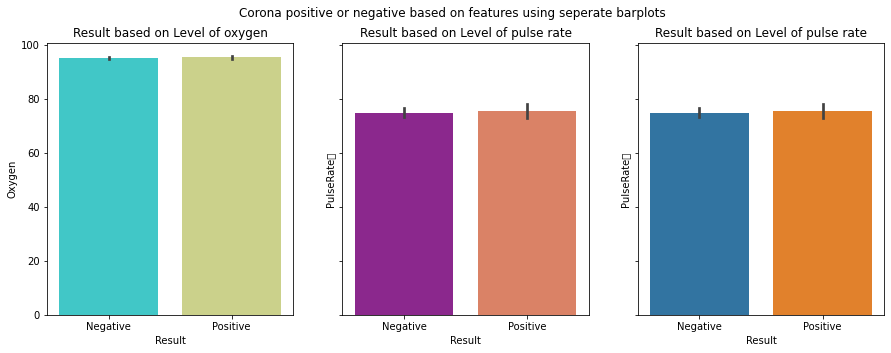

In [ ]:
# Barplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

fig.suptitle("Corona positive or negative based on features using seperate barplots")

axes[0].set_title("Result based on Level of oxygen")
axes[1].set_title("Result based on Level of pulse rate")
axes[2].set_title("Result based on Level of pulse rate")

sns.barplot(ax=axes[0], x='Result', y='Oxygen', data=corona_df, palette='rainbow')
sns.barplot(ax=axes[1], x='Result', y='PulseRate\t', data=corona_df, palette='plasma')
sns.barplot(ax=axes[2], x='Result', y='PulseRate\t', data=corona_df)
plt.show()

In [ ]:
# seperationg features and results
features_df = corona_df[['Oxygen', 'PulseRate\t', 'Temperature']]
X = np.array(features_df)
y = np.array(corona_df['Result'])

/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)


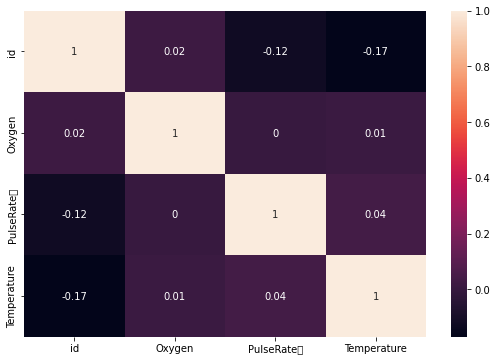

In [ ]:
# corr() to calculate the correlation between variables
correlation_matrix = corona_df.corr().round(2)
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

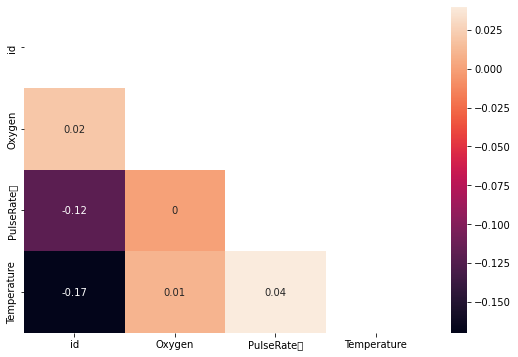

In [ ]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


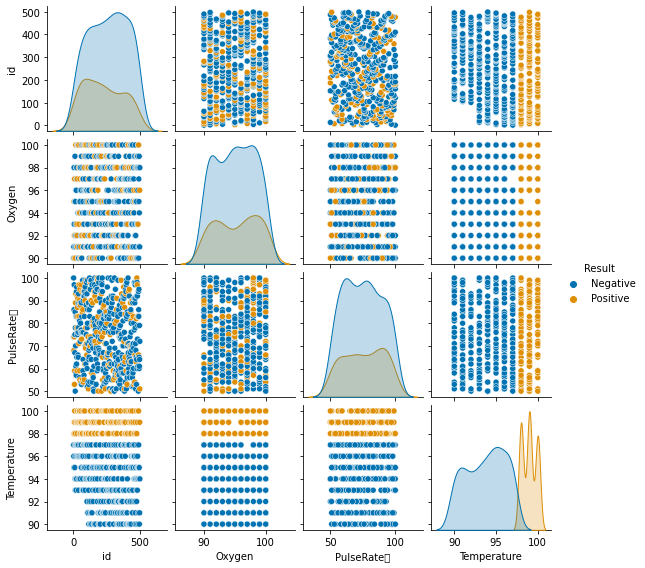

In [ ]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(corona_df, hue="Result", height = 2, palette = 'colorblind');

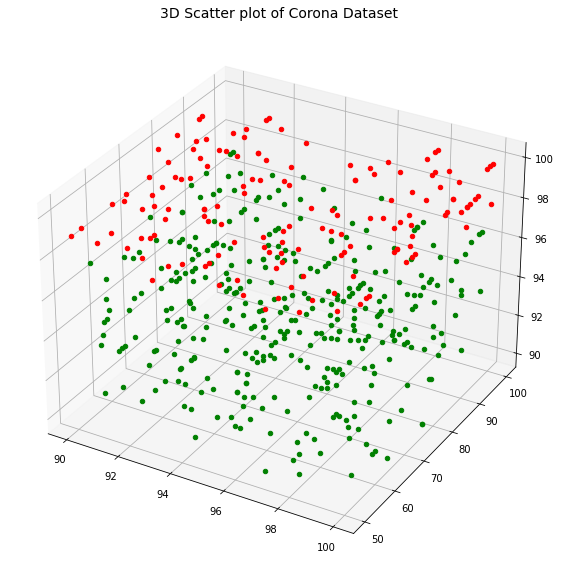

Red --> Corona Positive | Green --> Corona Negative


In [ ]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
x_axis = corona_df['Oxygen']
y_axis = corona_df['PulseRate\t']
z_axis = corona_df['Temperature']
c = x_axis + y_axis

for i in range(len(y)):
    if y[i] == 'Positive':
        ax.scatter(x_axis[i], y_axis[i], z_axis[i], color='red')
    else:
        ax.scatter(x_axis[i], y_axis[i], z_axis[i], color='green')

# syntax for plotting
ax.set_title('3D Scatter plot of Corona Dataset', fontsize=14)
plt.show()

print('Red --> Corona Positive | Green --> Corona Negative')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

print("X_train shape: ", X_train.shape)

print("X_test shape: ", X_test.shape)

print("y_train shape: ", y_train.shape)

print("y_test shape: ", y_test.shape)

X_train shape:  (349, 3)
X_test shape:  (150, 3)
y_train shape:  (349,)
y_test shape:  (150,)


In [ ]:
#importing the necessary package to use the classification algorithm

from sklearn import svm #for Support Vector Machine (SVM) Algorithm

model_svm = svm.SVC() #select the algorithm


In [ ]:
model_svm.fit(X_train, y_train) #train the model with the training dataset

SVC()

In [ ]:
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model

# checking the accuracy of the algorithm.

# by comparing predicted output by the model and the actual output

score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)

print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")

# save the accuracy score

score = set()

score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9867
----------------------------------


In [ ]:
# importing the necessary package to use the classification algorithm

from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

model_dt = DecisionTreeClassifier(random_state=4)

model_dt.fit(X_train, y_train) #train the model with the training dataset

y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)

print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")

# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 1.0
---------------------------------


In [ ]:
# importing the necessary package to use the classification algorithm

from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours

#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm

model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class

model_knn.fit(X_train, y_train) #train the model with the training dataset

y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)

print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")

# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.9333
----------------------------------


In [ ]:
# importing the necessary package to use the classification algorithm

from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train) #train the model with the training dataset

y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)

print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")

# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 1.0
---------------------------------


In [ ]:
# importing the necessary package to use the classification algorithm

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train, y_train) #train the model with the training dataset

y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)

print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")

# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 1.0
---------------------------------


In [ ]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
    print(s)

The accuracy scores of different Models:
----------------------------------------
('SVM', 0.9867)
('DT', 1.0)
('LR', 1.0)
('NB', 1.0)
('KNN', 0.9333)
